# 1. Research Question
What factors are related to the share of female inventors, relative to the number of all inventors, among OECD (Organisation for Economic Co-operation and Development) member countries?

### Secondary Questions:
1. What domestic factors are related to the (relative) number of female inventors?
2. Education is believed to have positive externalities. Is education also related to the growth of female inventors group?
3. Social resources can have tremendous effect on a social agent's life decision. Would social resources (access to capital / training opportunities) have strong relation with the percentage of women among inventors?
4. Initiatives / motivations play a great role in an inventor's story. How strong (or weak) is the connection between the scale of female inventors and female citizens' general attitude towards entrepreneurial risks?

# 2. Data Cleaning

## 2.1 Dataset: Share of Women Inventors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

5 Datasets are downloaded before preprocessing in this jupyter notebook:

2 datasets from Max Roser and Esteban Ortiz-Ospina (2013) - "Tertiary Education". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/tertiary-education' [Online Resource].

1. gpi-tertiary-education.csv 
2. share-graduates-stem-female.csv

3 datasets from OECD.Stat (https://stats.oecd.org/index.aspx?queryid=83119#).

1. Share_of_women_inventors.csv 
2. Attitude_towards_entrepreneurial_risk_by_sex.csv 
3. Access_to_training_and_money_to_start_a_business_by_sex.csv 

In [2]:
#load raw dataset of Share of Women Inventors
share_of_women_inventors = pd.read_csv("share_of_women_inventors.csv")

#get rid of undesired columns
share_of_women_inventors = share_of_women_inventors.drop(columns=['LOCATION','INDICATOR','SEX','Sex','AGE','Age','TIME','Unit Code','PowerCode Code','PowerCode','Reference Period Code','Reference Period','Flag Codes','Flags'])

#merge indicator and value columns to one column
share_of_women_inventors['Share of Women Inventors (%)'] = share_of_women_inventors['Value']

#get rid of the original indicator and value columns
share_of_women_inventors = share_of_women_inventors.drop(columns=['Indicator','Value'])

#view of the dataset
share_of_women_inventors.head()

,Country,Year,Unit,Share of Women Inventors (%)
0,Argentina,1996,Percentage,10.7
1,Argentina,1997,Percentage,8.6
2,Argentina,1998,Percentage,9.4
3,Argentina,1999,Percentage,12.9
4,Argentina,2000,Percentage,16.4


To clarity, GPI Ratio of female to male net enrolment ratio for tertiary education. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI of 1 indicates parity between females and males. A value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females. 

In [3]:
#size of the dataset
share_of_women_inventors.shape

(1074, 4)

In [4]:
#create a list of desired OECD countries
countries = set(
    [
        "Australia",
        "Austria",
        "Belgium",
        "Canada",
        "Chile",
        "Colombia",
        "Denmark",
        "Finland",
        "France",
        "Germany",
        "Greece",
        "Hungary",
        "Iceland",
        "Ireland",
        "Israel",
        "Italy",
        "Japan",
        "Lithuania",
        "Luxembourg",
        "Mexico",
        "Netherlands",
        "New Zealand",
        "Norway",
        "Poland",
        "Portugal",
        "Slovakia",
        "Slovenia",
        "Spain",
        "Sweden",
        "Switzerland",
        "Turkey",
        "United Kingdom",
        "United States",
    ]
)

In [5]:
#filter out the desired countries in the dataset
share_of_women_inventors_1 = share_of_women_inventors.loc[share_of_women_inventors.Country.isin(countries)]

#reset index
share_of_women_inventors_1.reset_index(drop='True')

,Country,Year,Unit,Share of Women Inventors (%)
0,Australia,1985,Percentage,4.4
1,Australia,1986,Percentage,4.7
2,Australia,1987,Percentage,5.7
3,Australia,1988,Percentage,6.0
4,Australia,1989,Percentage,6.5
...,...,...,...,...
913,United States,2013,Percentage,12.1
914,United States,2014,Percentage,12.1
915,United States,2015,Percentage,12.1
916,United States,2016,Percentage,11.9


In [6]:
years = set(
    [
        "2010",
        "2011",
        "2012",
        "2013",
        "2014",
    ]
)

In [7]:
#filter out the desired countries in the dataset
share_of_women_inventors_final = share_of_women_inventors_1.loc[share_of_women_inventors_1.Year.astype(str).isin(years)]

In [8]:
#view of cleaned dataset
share_of_women_inventors_final.head()

#reset index
share_of_women_inventors_final.reset_index(drop='True')

,Country,Year,Unit,Share of Women Inventors (%)
0,Australia,2010,Percentage,10.7
1,Australia,2011,Percentage,11.0
2,Australia,2012,Percentage,11.1
3,Australia,2013,Percentage,11.4
4,Australia,2014,Percentage,11.5
...,...,...,...,...
160,United States,2010,Percentage,11.7
161,United States,2011,Percentage,11.7
162,United States,2012,Percentage,11.8
163,United States,2013,Percentage,12.1


In [9]:
#size of the cleaned dataset
share_of_women_inventors_final.shape

(165, 4)

## 2.2 Dataset: Education Factors

In [10]:
#load raw dataset of GPI enrollment ratio of tertiary education (women to men)
gpi = pd.read_csv("gpi-tertiary-education.csv")

#get rid of undesired columns
gpi = gpi.drop(columns=['Code'])

#view of the dataset
gpi.head()

,Country,Year,"Gross enrolment ratio, tertiary, gender parity index (GPI)"
0,Afghanistan,1970,0.16565
1,Afghanistan,1972,0.15370
2,Afghanistan,1973,0.18578
3,Afghanistan,1974,0.16274
4,Afghanistan,1975,0.16533


In [11]:
#size of the dataset
gpi.shape

(5382, 3)

In [12]:
#filter out the desired countries in the dataset
gpi_1 = gpi.loc[gpi.Country.isin(countries)]

In [13]:
#filter out the desired countries in the dataset
gpi_final = gpi_1.loc[gpi_1.Year.astype(str).isin(years)]

In [14]:
#view of cleaned dataset
gpi_final.head()

#reset index
gpi_final.reset_index(drop='True')

,Country,Year,"Gross enrolment ratio, tertiary, gender parity index (GPI)"
0,Australia,2010,1.38099
1,Australia,2011,1.39396
2,Australia,2012,1.40529
3,Australia,2013,1.40312
4,Australia,2014,1.40312
...,...,...,...
160,United States,2010,1.40825
161,United States,2011,1.40311
162,United States,2012,1.40738
163,United States,2013,1.38494


In [15]:
#view of cleaned dataset
gpi_final.head()

#reset index
gpi_final.reset_index(drop='True')

,Country,Year,"Gross enrolment ratio, tertiary, gender parity index (GPI)"
0,Australia,2010,1.38099
1,Australia,2011,1.39396
2,Australia,2012,1.40529
3,Australia,2013,1.40312
4,Australia,2014,1.40312
...,...,...,...
160,United States,2010,1.40825
161,United States,2011,1.40311
162,United States,2012,1.40738
163,United States,2013,1.38494


In [16]:
#size of the cleaned dataset
gpi_final.shape

(165, 3)

In [17]:
#load raw dataset of Percentage of Women in Science and Tech majors
sci_tech_women = pd.read_csv("share-graduates-stem-female.csv")

#get rid of undesired columns
sci_tech_women = sci_tech_women.drop(columns=['Code'])

#view of the dataset
sci_tech_women.head()

,Country,Year,Percentage of graduates from Science and Technology programmes in tertiary education who are female (%)
0,Afghanistan,2014,10.632770
1,Albania,2000,29.968451
2,Albania,2003,44.200630
3,Albania,2011,48.064209
4,Albania,2013,52.198551


In [18]:
#size of the dataset
sci_tech_women.shape

(1100, 3)

In [19]:
#filter out the desired countries in the dataset
sci_tech_women_1 = sci_tech_women.loc[sci_tech_women.Country.isin(countries)]

In [20]:
#filter out the desired countries in the dataset
sci_tech_women_final = sci_tech_women_1.loc[sci_tech_women_1.Year.astype(str).isin(years)]

In [21]:
#view of cleaned dataset
sci_tech_women_final.head()

#reset index
sci_tech_women_final.reset_index(drop='True')

,Country,Year,Percentage of graduates from Science and Technology programmes in tertiary education who are female (%)
0,Australia,2010,29.322420
1,Australia,2011,29.104170
2,Australia,2012,NaN
3,Australia,2013,NaN
4,Australia,2014,29.765360
...,...,...,...
160,United States,2010,30.906891
161,United States,2011,30.387581
162,United States,2012,30.390720
163,United States,2013,31.001530


In [22]:
#size of the cleaned dataset
sci_tech_women_final.shape

(165, 3)

## 2.3 Dataset: Social Resource Factors

In [23]:
#load data
access_women = pd.read_csv("Access_to_training_and_money_to_start_a_business_by_sex.csv")

#get rid of undesired data
access_women = access_women.drop(columns=['LOCATION','INDICATOR','SEX','AGE','Age','TIME','Unit Code','Unit','PowerCode Code','PowerCode','Reference Period Code','Reference Period','Flag Codes','Flags'])

#view of the dataset
access_women.head()

,Country,Indicator,Sex,Time,Value
0,Australia,Access to training on how to start a business,Women,2013,67.871
1,Australia,Access to money to start a business,Women,2013,41.324
2,Australia,Access to training on how to start a business,Men,2013,65.745
3,Australia,Access to money to start a business,Men,2013,57.703
4,Austria,Access to training on how to start a business,Women,2013,61.505


In [24]:
#view size of datasize
access_women.shape

(152, 5)

In [25]:
#get rid of men access
access_training_women = access_women.loc[(access_women['Indicator']=='Access to training on how to start a business') & (access_women['Sex']=='Women')]

#view of dataset
access_training_women.head()

,Country,Indicator,Sex,Time,Value
0,Australia,Access to training on how to start a business,Women,2013,67.871
4,Austria,Access to training on how to start a business,Women,2013,61.505
9,Belgium,Access to training on how to start a business,Women,2013,43.878
13,Brazil,Access to training on how to start a business,Women,2013,20.995
16,Canada,Access to training on how to start a business,Women,2013,64.711


In [26]:
#size of the new dataset
access_training_women.shape

(38, 5)

In [27]:
#clean and rename columns
access_training_women_final = access_training_women.loc[access_training_women.Country.isin(countries)].reset_index()
access_training_women_final = access_training_women_final.drop(columns=['index'])

access_training_women_final.rename(columns={'Value':'Percentage of women declaring that they have access to training on how to start a business (%)'}, inplace=True)
access_training_women_final.rename(columns={'Time':'Year'}, inplace=True)
access_training_women_final = access_training_women_final.drop(columns=['Sex','Indicator'])

#view of dataset
access_training_women_final.head()

,Country,Year,Percentage of women declaring that they have access to training on how to start a business (%)
0,Australia,2013,67.871
1,Austria,2013,61.505
2,Belgium,2013,43.878
3,Canada,2013,64.711
4,Chile,2013,29.034


In [28]:
#size of the dataset
access_training_women_final.shape

(28, 3)

In [29]:
#get rid of men stats
access_money_women = access_women.loc[(access_women['Indicator']=='Access to money to start a business') & (access_women['Sex']=='Women')]

#view of dataset
access_money_women.head()

,Country,Indicator,Sex,Time,Value
1,Australia,Access to money to start a business,Women,2013,41.324
5,Austria,Access to money to start a business,Women,2013,48.044
8,Belgium,Access to money to start a business,Women,2013,32.129
12,Brazil,Access to money to start a business,Women,2013,16.677
17,Canada,Access to money to start a business,Women,2013,49.541


In [30]:
#size of the dataset
access_money_women.shape

(38, 5)

In [31]:
#clean and rename columns
access_money_women_final = access_money_women.loc[access_money_women.Country.isin(countries)].reset_index()
access_money_women_final = access_money_women_final.drop(columns=['index'])

access_money_women_final.rename(columns={'Value':'Percentage of women declaring that they have access to money to start a business (%)'}, inplace=True)
access_money_women_final.rename(columns={'Time':'Year'}, inplace=True)
access_money_women_final = access_money_women_final.drop(columns=['Sex','Indicator'])

#size of the dataset
access_money_women_final.head()

,Country,Year,Percentage of women declaring that they have access to money to start a business (%)
0,Australia,2013,41.324
1,Austria,2013,48.044
2,Belgium,2013,32.129
3,Canada,2013,49.541
4,Chile,2013,18.017


In [32]:
#size of the dataset
access_money_women_final.shape

(28, 3)

## 2.4 Dataset: Attitude Factor

In [33]:
#load data
attitude_risk_women = pd.read_csv("Attitude_towards_entrepreneurial_risk_by_sex.csv")

#get rid of undesired data
attitude_risk_women = attitude_risk_women.drop(columns=['LOCATION','INDICATOR','SEX','AGE','Age','TIME','Unit Code','Unit','PowerCode Code','PowerCode','Reference Period Code','Reference Period','Flag Codes','Flags'])

#view of the dataset
attitude_risk_women.head()

,Country,Indicator,Sex,Time,Value
0,Australia,Attitude towards entrepreneurial risk,Women,2013,45.305
1,Australia,Attitude towards entrepreneurial risk,Men,2013,53.772
2,Austria,Attitude towards entrepreneurial risk,Women,2013,23.726
3,Austria,Attitude towards entrepreneurial risk,Men,2013,39.002
4,Belgium,Attitude towards entrepreneurial risk,Women,2013,31.192


In [34]:
#size of the dataset
attitude_risk_women.shape

(76, 5)

In [35]:
#get rid of men attitudes
attitude_risk_women = attitude_risk_women.loc[(attitude_risk_women['Indicator']=='Attitude towards entrepreneurial risk') & (attitude_risk_women['Sex']=='Women')]

#view of the dataset
attitude_risk_women.head()

,Country,Indicator,Sex,Time,Value
0,Australia,Attitude towards entrepreneurial risk,Women,2013,45.305
2,Austria,Attitude towards entrepreneurial risk,Women,2013,23.726
4,Belgium,Attitude towards entrepreneurial risk,Women,2013,31.192
6,Brazil,Attitude towards entrepreneurial risk,Women,2013,59.766
8,Canada,Attitude towards entrepreneurial risk,Women,2013,56.682


In [36]:
#size of the dataset
attitude_risk_women.shape

(38, 5)

In [37]:
#clean and rename columns
attitude_risk_women_final = attitude_risk_women.loc[attitude_risk_women.Country.isin(countries)].reset_index()
attitude_risk_women_final = attitude_risk_women_final.drop(columns=['index'])

attitude_risk_women_final.rename(columns={'Value':'Percentage of women prefering taking a risk and starting a new business to working for someone else (%)'}, inplace=True)
attitude_risk_women_final.rename(columns={'Time':'Year'}, inplace=True)
attitude_risk_women_final = attitude_risk_women_final.drop(columns=['Sex','Indicator'])

#view of the dataset
attitude_risk_women_final.head()

,Country,Year,Percentage of women prefering taking a risk and starting a new business to working for someone else (%)
0,Australia,2013,45.305
1,Austria,2013,23.726
2,Belgium,2013,31.192
3,Canada,2013,56.682
4,Chile,2013,70.783


In [38]:
#size of the dataset
attitude_risk_women_final.shape

(28, 3)

## 2.5 Dataset Merge

In [39]:
#merge datasets of education factors
education = pd.merge(gpi_final, sci_tech_women_final,how='outer')

#view of the new dataset
education.head(165)

,Country,Year,"Gross enrolment ratio, tertiary, gender parity index (GPI)",Percentage of graduates from Science and Technology programmes in tertiary education who are female (%)
0,Australia,2010,1.38099,29.322420
1,Australia,2011,1.39396,29.104170
2,Australia,2012,1.40529,NaN
3,Australia,2013,1.40312,NaN
4,Australia,2014,1.40312,29.765360
...,...,...,...,...
160,United States,2010,1.40825,30.906891
161,United States,2011,1.40311,30.387581
162,United States,2012,1.40738,30.390720
163,United States,2013,1.38494,31.001530


In [40]:
#size of the new dataset
education.shape

(165, 4)

In [41]:
#merge datasets of education factors
result = pd.merge(share_of_women_inventors_final, education, on=['Year','Country'])

#view of new dataset
result.head()

,Country,Year,Unit,Share of Women Inventors (%),"Gross enrolment ratio, tertiary, gender parity index (GPI)",Percentage of graduates from Science and Technology programmes in tertiary education who are female (%)
0,Australia,2010,Percentage,10.7,1.38099,29.32242
1,Australia,2011,Percentage,11.0,1.39396,29.10417
2,Australia,2012,Percentage,11.1,1.40529,NaN
3,Australia,2013,Percentage,11.4,1.40312,NaN
4,Australia,2014,Percentage,11.5,1.40312,29.76536


In [42]:
result.shape

(165, 6)

In [43]:
#merge datasets of employment factors with the above merged dataset
final = pd.merge(result, access_training_women_final, on=['Country'], how='left', suffixes=('', '_y'))

final = final.drop(columns=['Year_y','Unit'])

#view of new dataset
final.head()

,Country,Year,Share of Women Inventors (%),"Gross enrolment ratio, tertiary, gender parity index (GPI)",Percentage of graduates from Science and Technology programmes in tertiary education who are female (%),Percentage of women declaring that they have access to training on how to start a business (%)
0,Australia,2010,10.7,1.38099,29.32242,67.871
1,Australia,2011,11.0,1.39396,29.10417,67.871
2,Australia,2012,11.1,1.40529,NaN,67.871
3,Australia,2013,11.4,1.40312,NaN,67.871
4,Australia,2014,11.5,1.40312,29.76536,67.871


In [44]:
#size of the new dataset
final.shape

(165, 6)

In [45]:
#merge datasets of employment factors with the above merged dataset
final = pd.merge(final, access_money_women_final, on=['Country'], how='left', suffixes=('', '_y'))

final = final.drop(columns=['Year_y'])

#view of new dataset
final.head()

,Country,Year,Share of Women Inventors (%),"Gross enrolment ratio, tertiary, gender parity index (GPI)",Percentage of graduates from Science and Technology programmes in tertiary education who are female (%),Percentage of women declaring that they have access to training on how to start a business (%),Percentage of women declaring that they have access to money to start a business (%)
0,Australia,2010,10.7,1.38099,29.32242,67.871,41.324
1,Australia,2011,11.0,1.39396,29.10417,67.871,41.324
2,Australia,2012,11.1,1.40529,NaN,67.871,41.324
3,Australia,2013,11.4,1.40312,NaN,67.871,41.324
4,Australia,2014,11.5,1.40312,29.76536,67.871,41.324


In [46]:
#size of the new dataset
final.shape

(165, 7)

In [47]:
#merge datasets of employment factors with the above merged dataset
final = pd.merge(final, attitude_risk_women_final, on=['Country'], how='left', suffixes=('', '_y'))

final = final.drop(columns=['Year_y'])

#view of new dataset
final.head(30)

,Country,Year,Share of Women Inventors (%),"Gross enrolment ratio, tertiary, gender parity index (GPI)",Percentage of graduates from Science and Technology programmes in tertiary education who are female (%),Percentage of women declaring that they have access to training on how to start a business (%),Percentage of women declaring that they have access to money to start a business (%),Percentage of women prefering taking a risk and starting a new business to working for someone else (%)
0,Australia,2010,10.700000,1.38099,29.322420,67.871,41.324,45.305
1,Australia,2011,11.000000,1.39396,29.104170,67.871,41.324,45.305
2,Australia,2012,11.100000,1.40529,NaN,67.871,41.324,45.305
3,Australia,2013,11.400000,1.40312,NaN,67.871,41.324,45.305
4,Australia,2014,11.500000,1.40312,29.765360,67.871,41.324,45.305
5,Austria,2010,5.600000,1.17002,23.489010,61.505,48.044,23.726
6,Austria,2011,5.400000,1.18257,25.145361,61.505,48.044,23.726
7,Austria,2012,5.400000,1.19864,25.540199,61.505,48.044,23.726
8,Austria,2013,5.400000,1.20621,25.146490,61.505,48.044,23.726
9,Austria,2014,5.600000,1.20348,25.482410,61.505,48.044,23.726


In [48]:
#size of the new dataset
final.shape

(165, 8)

# 3. Data Description

#### What are the observations (rows) and the attributes (columns)?

The observations (rows) are the 33 OECD member countries, and the attributes (columns) are country, year, and the five variables from four datasets: Access to training to start a business, access to training to start a business, attitude towards entrepreneurial risk, GPI enrollment ratio of tertiary education (women to men) and Percentage of women major in Science and Technology majors.

#### Why was this dataset created?

We created this dataset to find out about possible factors that may influence the share of women inventors relative to the total number of inventors. Inventors are defined as ones that focus on creating new products, while they also inherit the nature of entreprenuers, which is taking the risk of inventing new products for profits. 

For a long period of time, women take on most domestic and family responsibilities, and seldome work. Evene when they started to step into workplaces, they received unfair wages and abusing treatments, comparing to men. Now that women are having higher social status, more of them gotten rid of the fate of being house wives and being repressed during work. They are also receiving better treatments at their workplaces. Apart from women being employees, we are also able to hear about many well-known and successful female entrepreneurs and inventors. After researching related areas, we found out about a dataset on the share of owmen inventors. We observed that there are significant increases in the share across countries, but the trend is somehow unpredictable and varied a lot. Some countries have higher share at a certain point, but suddenly decreases dramatically after the peak value. Therefore, we are curious about factors that contribute the fluactuation in numbers of women inventors across time and countries.

We therefore raised some secondary question including what role domestic factors, education, social resources, and personal motivations are playing in influence share of women factors. 

We focused on OECD member countries since they are mostly developed countries, so they have similar economic and political situations. We collected five variables that might influence the share of women inventors based on research: Access to training to start a business, access to training to start a business, attitude towards entrepreneurial risk, GPI enrollment ratio of tertiary education (women to men) and percentage of graduates from Science and Technology programmes in tertiary education who are female. We want to compare the factors accross the five years as well as countries to figure out the answer to our research question. Since the factors are collected from different datasets, we merge them into a relatively concise dataset shown above to better carry out the following analysis.

#### Who funded the creation of the dataset?
The dataset for share of women inventors is from estimates based on PATSTAT database. The datasets for Access to training and money to start a business by sex and Attitude towards entrepreneurial risk by sex are from Gallup. The datasets for GPI enrollment ratio of tertiary education (women to men) and Percentage of women major in Science and Technology majors are form UNESCO Institute for Statistics, published by World Bank EdStats.

A more thorough documentation of sources and description of raw datasets can be found in this Google doc we created: https://docs.google.com/document/d/1VErYKO1LZg3yLdvlMQ3RTLXYmMFLk6cFQSOs9pd_IHQ/edit?usp=sharing

#### What processes might have influenced what data was observed and recorded and what was not?

The datasets we found, including share of owmen inventors as well as possible factors that might influence the share, are all on OECD member countries. It is hard to obtain data of developing and under-developed countries. We conjecture that this is due to the accessibily and ability to collect data from citizens. OECD countries also have the technology and comprehensive methods of recording and developing these datasets mianly through calculation through algorith that identify dependent variables, such as the number of inventors of different genders, on the basis of a large list of male and female.

Moreover, among the data of OECD member countries, we also observe several NaNs, this may be due to the sequence and time each country join the OECD union. 

#### What preprocessing was done, and how did the data come to be in the form that you are using?

We merge the five variables from four datasets: Access to training to start a business, access to training to start a business, attitude towards entrepreneurial risk, GPI enrollment ratio of tertiary education (women to men) and Percentage of women major in Science and Technology majors. We went through a long data cleaning process by changing all the datasets into ones with the same number, alphabetical order of country name, and time range.

The countries we chose, as mentioned above, are all member countries of OECD that have similar economic and political conditions. The time range we came across is from 2010-2014, a total of five years. The reason why we choose this time range is because it was the post-financial-crisis stage. We are curious in learning about how the financial crisis may influence the share of women inventors, given that the overall environment has changed significantly. We believe this 5-year period is representative. In addition, we are able to gather data of different factors and across all 33 countries in these 5 years, which is beneficial for our later exploration and analysis.

We also carried out a thorough cleaning and merging of columns so that the final combination of the four datasets is feasible and organized. 

#### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

All of our data are from authoritative dataset sources, so there were no people involved.

#### Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 

Here is the shared drive to our raw source data:
https://drive.google.com/drive/folders/1v-iBVRjUGSWxAnkwVBzUr9Do9cALBF_L?usp=sharing 

# 4. Data Limitations

One limit of our dataset is that we didn't include the public opinions on women inventors (or entrepreneurs), which can be an important externality that influence the share of women inventors. Though we thought about this critical factor, we didn't include it since public opinions are hard to be quantized. We didn't find suitable data source that include data from the countries and timeframe we are researching on either.

In terms of harm and gap, our dataset is also limited by the choice of countries. We only focus on OECD member countries, which are all already developed. Therefore, our dataset can only reflect the situation of women inventors in developed countries, but we are unable to explore that of devloping and undert-developed ones. The population of developed countries only make up of a small proportion of the world population, so our dataset cannot reflect the overall realistic situation of women. If we want to actually figure out underlying trend and reasons that influence share of owmen inventors, we should go beyond just looking at developed countries. We should in turn focus more on missing data and try to collect data from all over the world. However, due to the limited time and resource, we only focus on existing data on developed countries, hoping to get a preliminary understanding of the topic of women inventors. Another associating limitation due to choice of countries is that there are only 33 OECD member countries, making our dataset relatively small in the scale. 

Last but not least, our dataset is also limited in the timeframe we chose. We only focus on data from 2010-2014, which is only a 5-year period. This period of time is also over 5 year from now. Though we believe this is a representative and meaningful period of time, our dataset is relatively small in its scale. There may be some other trends and influencial factors that might influence share of women inventors, but we cannot include them.

In all, though we have included multiple valuable variables that may influence share of women inventors that can potentially bring interesting discussion and analysis of the issue, our dataset size is not massive enough to conclude a comprehensive result. 

# 5. Exploratory Data Analysis

In [49]:
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-notebook')


### In Part 5 "Exploratory Data Analysis," we will provide important summary statistics and typical values for the percentage of female inventors.

### We will draw plots to show the statistics, and use what we learned from the lecture to find out the connections between variables.


In [50]:
print("Let's take a glance at the 'Share of Women Inventors' for some countries as examples.")
print("Some of them are the most developed countries, like the US and Japan, and ")

print()

print("Mean of 'Share of Women Inventors' between 2010 and 2014:")

grouped = final.groupby('Country')

group_US = np.round(grouped['Share of Women Inventors (%)'].mean()['United States'], decimals=2)
print("AMERICA: " + str(group_US) + "%")

group_UK = np.round(grouped['Share of Women Inventors (%)'].mean()['United Kingdom'], decimals=2)
print("BRITAIN: " + str(group_UK) + "%")

group_CHI = np.round(grouped['Share of Women Inventors (%)'].mean()['Chile'], decimals=2)
print("CHILE:   " + str(group_CHI) + "%")

group_COL = np.round(grouped['Share of Women Inventors (%)'].mean()['Colombia'], decimals=2)
print("COLOMBIA:" + str(group_COL) + "%")

group_JPN = np.round(grouped['Share of Women Inventors (%)'].mean()['Japan'], decimals=2)
print("JAPAN:   " + str(group_JPN) + "%")

group_PRT = np.round(grouped['Share of Women Inventors (%)'].mean()['Portugal'], decimals=2)
print("PORTUGAL:" + str(group_PRT) + "%")

group_POL = np.round(grouped['Share of Women Inventors (%)'].mean()['Poland'], decimals=2)
print("POLAND:  " + str(group_POL) + "%")

Let's take a glance at the 'Share of Women Inventors' for some countries as examples.
Some of them are the most developed countries, like the US and Japan, and 

Mean of 'Share of Women Inventors' between 2010 and 2014:
AMERICA: 11.88%
BRITAIN: 10.08%
CHILE:   22.34%
COLOMBIA:18.5%
JAPAN:   7.36%
PORTUGAL:21.74%
POLAND:  18.48%


In [51]:
mean_all = np.round(final['Share of Women Inventors (%)'].mean(), decimals=2)
print("Global Mean of 'Share of Women Inventors (%)' between 2010 and 2014: " + str(mean_all) + "%")

std_all = np.round(grouped['Share of Women Inventors (%)'].mean().std(), decimals=2)
print("Global Standard Deviation of 'Share of Women Inventors (%)' between 2010 and 2014: " + str(std_all) + "%")

Global Mean of 'Share of Women Inventors (%)' between 2010 and 2014: 12.19%
Global Standard Deviation of 'Share of Women Inventors (%)' between 2010 and 2014: 4.65%


In [52]:
print("Let's take a glance at the means of 'Share of Women Inventors (%)' of each OECD country:")
np.round(grouped['Share of Women Inventors (%)'].describe()["mean"], decimals=2)

Let's take a glance at the means of 'Share of Women Inventors (%)' of each OECD country:


Country
Australia         11.14
Austria            5.48
Belgium           12.90
Canada            12.06
Chile             22.34
Colombia          18.50
Denmark           10.82
Finland            9.50
France            13.52
Germany            7.10
Greece            18.96
Hungary            8.34
Iceland            8.82
Ireland            9.70
Israel            13.24
Italy             11.08
Japan              7.36
Lithuania         19.26
Luxembourg         8.42
Mexico            13.36
Netherlands        9.02
New Zealand        9.44
Norway             8.60
Poland            18.48
Portugal          21.74
Slovakia           5.44
Slovenia          14.24
Spain             19.80
Sweden             8.22
Switzerland       10.12
Turkey            13.42
United Kingdom    10.08
United States     11.88
Name: mean, dtype: float64



### What we discovered: The huge gap of female inventor percentage exists among OECD countries, and the most developed countries not necessarily have the highest percentage.

### What about the change in the share of women inventors during these 5 years? Will countries vary substancially in it?


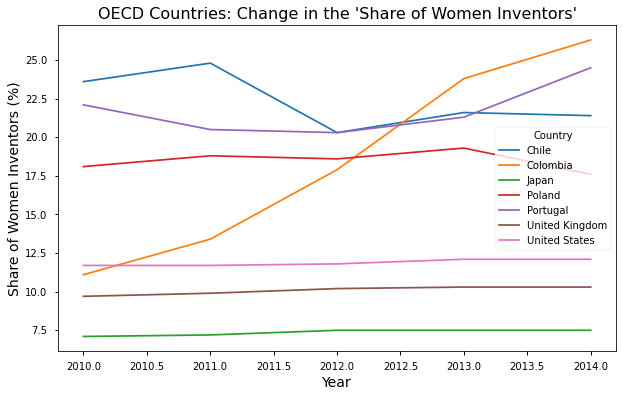

In [53]:
# Domestic change in the 'Share of Women Inventors'

example = set(["United States","United Kingdom","Chile","Colombia","Japan","Portugal","Poland"])

compare_example = final.loc[final.Country.isin(example)]

plt.figure(figsize=(10,6))
line = sns.lineplot(x='Year', y='Share of Women Inventors (%)', hue="Country", data=compare_example)
plt.xlabel("Year", size = 14)
plt.ylabel("Share of Women Inventors (%)", size = 14)
plt.title("OECD Countries: Change in the 'Share of Women Inventors'", size=16)
plt.show()


### As what the figure above shows, we can find that some countries maintain a relatively low 'share of female inventors' for five years, while the others are developing and may experience markable fluctuations.

### What is related to this phenomena? Would education be the important factors that might have relation, or even causation, with it?


Let's create a barchart for Gross enrolment ratio, tertiary, gender parity index (GPI).

*NOTE: missing Canada data*


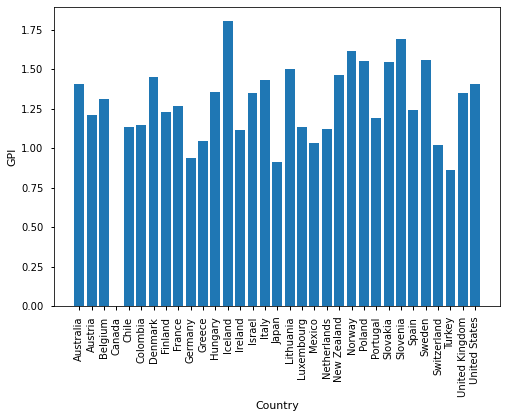

In [54]:
print("Let's create a barchart for Gross enrolment ratio, tertiary, gender parity index (GPI).")
print()
print("*NOTE: missing Canada data*")

x = final.Country
y = final['Gross enrolment ratio, tertiary, gender parity index (GPI)']
plt.bar(x,y)
plt.xlabel('Country')
plt.xticks(rotation='vertical')
plt.ylabel('GPI')
plt.show()

Create a barchart for Percentage of graduates from Science and Technology programmes in tertiary education who are female (%).

*NOTE: missing Canada & Israel data*


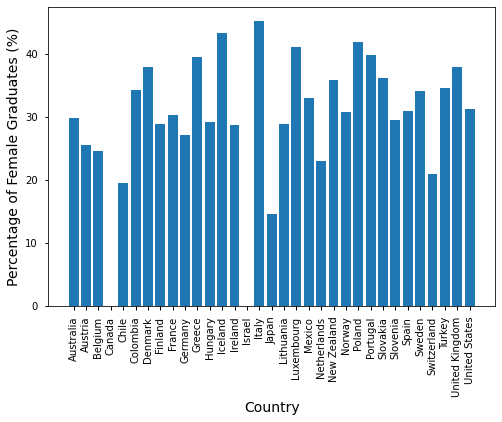

In [55]:
print("Create a barchart for Percentage of graduates from Science and Technology programmes in tertiary education who are female (%).")
print()
print("*NOTE: missing Canada & Israel data*")

x = final.Country
y = final['Percentage of graduates from Science and Technology programmes in tertiary education who are female (%)']

plt.bar(x,y)

plt.xlabel('Country', size = 14)
plt.xticks(rotation='vertical')
plt.ylabel('Percentage of Female Graduates (%)', size = 14)

plt.show()


### Observations of the charts above give us important insights: Gross enrolment ratio, tertiary, gender parity index (GPI) might not be a good predictor of the percentage of female inventors, given that the GPI does not vary a lot among OECD countries.

### Let's check the correlation between 'Share of Women Inventors (%)' and multiple variables.


In [56]:
correlation_GPI = grouped['Share of Women Inventors (%)'].mean().corr(grouped['Gross enrolment ratio, tertiary, gender parity index (GPI)'].mean())
correlation_STEM = grouped['Share of Women Inventors (%)'].mean().corr(grouped['Percentage of graduates from Science and Technology programmes in tertiary education who are female (%)'].mean())
correlation_train = grouped['Share of Women Inventors (%)'].mean().corr(grouped['Percentage of women declaring that they have access to training on how to start a business (%)'].mean())
correlation_money = grouped['Share of Women Inventors (%)'].mean().corr(grouped['Percentage of women declaring that they have access to money to start a business (%)'].mean())
correlation_attitude = grouped['Share of Women Inventors (%)'].mean().corr(grouped['Percentage of women prefering taking a risk and starting a new business to working for someone else (%)'].mean())

print( ("Correlation for GPI:     ") + str(correlation_GPI) )
print( ("Correlation for STEM:     ") + str(correlation_STEM) )
print( ("Correlation for Training:") + str(correlation_train) )
print( ("Correlation for Money:   ") + str(correlation_money) )
print( ("Correlation for Attitude: ") + str(correlation_attitude) )

Correlation for GPI:     -0.08894196173543101
Correlation for STEM:     0.1675552771382865
Correlation for Training:-0.2951020622681317
Correlation for Money:   -0.47871431431135136
Correlation for Attitude: 0.5250063650115774



### These numbers now give us a sense of what variables are important, but correlation itself only suggests linear relation, so we should be careful about what is going on between the 'Share of Women Inventors (%)' and these variables.

### Now, we may assume that the access to money and attitude towards entrepreneural risks are likely to have a linear relation with the growth of female inventor group. Let's check it by drawing scatter plots.


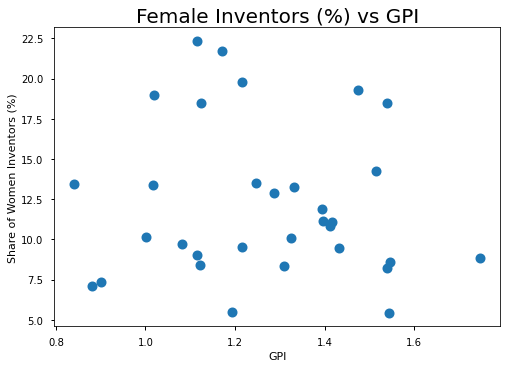

In [57]:
X = grouped['Gross enrolment ratio, tertiary, gender parity index (GPI)'].mean()
Y = grouped['Share of Women Inventors (%)'].mean()

plt.scatter(X, Y, linewidths=3)
plt.xlabel('GPI')
plt.ylabel('Share of Women Inventors (%)')
plt.title("Female Inventors (%) vs GPI", size=20)
plt.show()

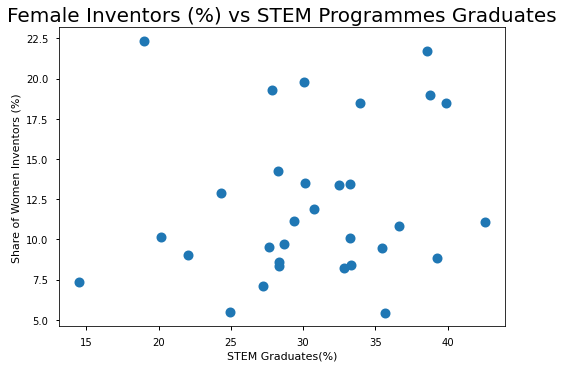

In [58]:
X = grouped['Percentage of graduates from Science and Technology programmes in tertiary education who are female (%)'].mean()
Y = grouped['Share of Women Inventors (%)'].mean()

plt.scatter(X, Y, linewidths=3)
plt.xlabel('STEM Graduates(%)')
plt.ylabel('Share of Women Inventors (%)')
plt.title("Female Inventors (%) vs STEM Programmes Graduates", size=20)
plt.show()

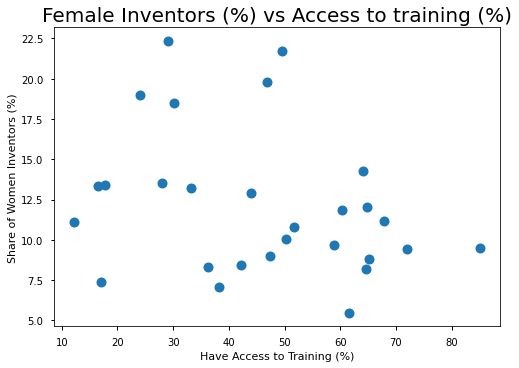

In [59]:
X = grouped['Percentage of women declaring that they have access to training on how to start a business (%)'].mean()
Y = grouped['Share of Women Inventors (%)'].mean()

plt.scatter(X, Y, linewidths=3)
plt.xlabel('Have Access to Training (%)')
plt.ylabel('Share of Women Inventors (%)')
plt.title("Female Inventors (%) vs Access to training (%)", size=20)
plt.show()

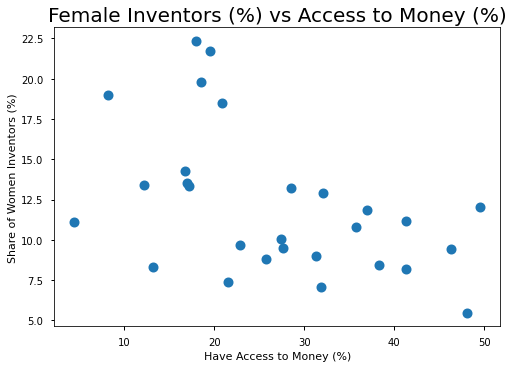

In [60]:
X = grouped['Percentage of women declaring that they have access to money to start a business (%)'].mean()
Y = grouped['Share of Women Inventors (%)'].mean()

plt.scatter(X, Y, linewidths=3)
plt.xlabel('Have Access to Money (%)')
plt.ylabel('Share of Women Inventors (%)')
plt.title("Female Inventors (%) vs Access to Money (%)", size=20)
plt.show()

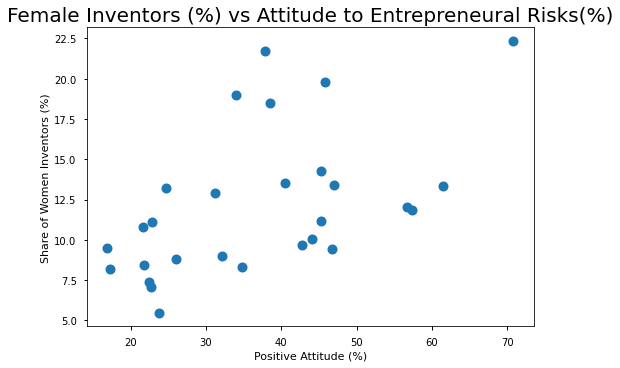

In [61]:
X = grouped['Percentage of women prefering taking a risk and starting a new business to working for someone else (%)'].mean()
Y = grouped['Share of Women Inventors (%)'].mean()

plt.scatter(X, Y, linewidths=3)
plt.xlabel('Positive Attitude (%)')
plt.ylabel('Share of Women Inventors (%)')
plt.title("Female Inventors (%) vs Attitude to Entrepreneural Risks(%)", size=20)
plt.show()

## Confirm/Update Research Questions and Data Description:

From the scatter plots above, we can find two patterns, though not very conspicuous: for those OECD countries where female survey respondents declare not having access to money, the percentages of female inventors are likely to be higher; for those OECD countries where the female survey respondents declare preference of taking risks and not working for someone else, the shares of women inventors are also likely to be higher.

What we can update with our research questions is that we find out that Education may not be a strong predictor of female inventors; also, our findings confirm the speculation of the relation between adventurous spirit and inventiveness for females. What might be counter-intuitive is that having access to money to start new business has negative relation with the percentage of female inventor in a country. A possibile explanation is that female property owners are less likely to take entrepreneural risks and pursue inventions, but we are not able to confirm this speculation yet.

## 6. Questions for Reviewers

1. Is our research question(s) so far detailed and overarching enough to have the potential to dig into?
2. Do you think the variables (factors that might influence share of women inventors) we include so far is enough? What variables or datasets can we look for further to make stronger arguments?
3. Given that we are only focusing on 2010-2014, shall we expand the time range to 10 years or even beyond so that we have more substantive data to come to a conclusion?